# Random Number Generators and Seeding

This week, we will turn to a new topic: generating and using random numbers. In the first lecture on this topic, we will look mainly at generating randomness in our programs. In later lectures we will turn to some examples on how we can use this randomness for different algorithms and scientific problems, and also how we can do testing on stochastic systems.

Randomness is important for many scientific applications, and many different problems and algorithms need access to be able to draw elements or samples at random. Also in other parts of programming, randomness can be an important topic. Most games for example, have a considerable component of randomness. Another major field that needs randomness is *cryptography*, which is needed to communicate securely, a crucial component of everything on the internet for example.

In the coming lectures, we will show some examples of using randomness, but for now, we simply state it: randomness is a [valuable commodity](https://en.wikipedia.org/wiki/Applications_of_randomness). We therefore need to know how to generate it.



## Some History

People have been generating random numbers by mechanical means for millennia, for example by throwing dice, spinning roulette wheels, shuffling cards, and so on. While these techniques might mostly be connected to games and gambling, we can use them to produce randomness for use in scientific studies, statistics and so on as well.

However, sitting at producing your own random numbers by rolling a die is cumbersome and time consuming. To get around this and make the task of producing randomness easier, random number tables would be distributed. These were simply random numbers that were generated, and then tabulated into large tables. As the tables already are random, it doesn't matter how you read these tables, you can go by row, by column, or diagonally for example. But having access to a random number table makes life easier if you need a few random samples.

To emphasize the importance of random numbers, you can take a look at the book *A Million Random Digits with 100,000 Normal Deviates*, first published in 1955 by the RAND company. As the name implies, this is a book of a million random digits. The interesting thing however, is that this book was considered quite groundbreaking, as it enabled more people access to a large number of random numbers than ever before.


```{figure} ../../figures/RAND.jpg
---
width: 400px
name: RAND
alt: RAND
---
```


The RAND's cooperation's book is an historically important example of the importance of randomness, but it has also seen a new print edition in 2001 with a new foreword. The book has a bunch of humorous [reviews on Amazon](https://www.amazon.com/Million-Random-Digits-Normal-Deviates/product-reviews/0833030477/).


## Randomness on Computers

With the advent of computers and computing, it was clear that having access to random numbers in a computer program would also be a valuable asset. However, there is an issue, because computers were created to be entirely stable and *deterministic*. There was simply no way for a computer to produce a random number from nothingness.

The solution was to "import" random numbers from outside sources. The RAND cooperations book *A million random digits* for example, also came in the format of punch cards, so that they could be read into the computers memory and used by a program. This process was however, very slow, and having access to a sufficient number of sufficiently random numbers was challenging.

Where did this randomness that was imported actually come from? These were taken from some physical setup that measured some seemingly random process. *A million random digits* for example, were taken from an electric roulette wheel connected to a large computer that kept spinning the wheel and noting the results. In modern days, many other physical systems for randomness have been proposed and used. Lava lamps have for example been popular, as the movement of the "lava" as it moves around and breaks up and merges together can be measured by an electric sensor and seemingly produces random outputs. Other options are looking at radioactive decay with a geiger counter, looking at thermal fluctuations or quantum mechanical noise. These are just some examples, and there are countless more.

Physical means of producing random numbers are still used today, the website [random.org](https://www.random.org/) for example, uses *atmospheric noise* to generate random numbers, the noise is measured by radio and tabulated into random number tables, which is then used when randomness is needed.


## Pseudorandomness

While there are many techniques to measuring physical randomness and using it, there are some problems with these techniques, which we will explain more later. An alternative is to let the computer produce its own random numbers.

Now, earlier, we said that this is problematic, because computers are fully deterministic machines, and this is still true. There is no way for a computer to produce non-deterministic randomness, if it is not connected to some physical RNG. However, in scientific programming, what we care about in our random numbers is the *statistics*. That means, even though they might be deterministic, if we can get the computer to produce numbers that look and behave like random numbers, from a statistical sense, then it will be sufficient for our purposes. We call this *statistically* random numbers. This concept is called [statistical randomness](https://en.wikipedia.org/wiki/Statistical_randomness).

In the rest of this lecture we will look at examples on how a computer can produce *statistical randomness* that is sufficient for scientific applications. However, it is important to stress that these are completely deterministic processes. To make this clear, another popular term is calling it *pseudorandomness*.

Any system that produces random numbers is called a *random number generator* or RNG for short. To emphasize that a software-based RNG produces pseudorandom numbers, it is often designated a PRNG/pRNG (pseudorandom number generator).


## Pseudorandom Number Generators

We will noe start looking at how to implement a pRNG on a computer. Now, recall that we cannot generate random numbers out of *nothing*, and so instead, to implement a pRNG, we will implement some rule for taking a number, and producing a new one from the first one. We can then take the second number, and produce a third one, and so one. A pRNG is effectively a *difference* equation that produces a sequence of numbers.

Now, because each number in the sequence i supposed to be statistically random, whatever rule or algorithm we do to find the next number in the sequence should produce a number that should be *uncorrelated* from the previous one. Put simply, each new number in the sequence should "look" random.

Because a pRNG effectively just keeps iterating to produce new numbers in a sequence, it needs some starting point. This is called the *seed* of the pRNG, and it is up to us, the user, to supply this seed. We will turn to discuss the seed a bit later, but for now, we simply pick some number.


### The Middle-Square Method

One of the first examples of a computer implemented pRNG was proposed by John von Neumann and is called the *middle-square method*. In this method, you find the next number in the sequence by first squaring your number, and then extracting the middle from that result.

Now, to start generating such a sequence, we need to start somewhere. Let us say we start with the number

$$X_0 = 4096.$$

We can now find the next number in the sequence by first squaring:

$$X_0^2 = 16777216,$$

and then extracting the middle digits. Because we started with a 4-digit number, we extract the middlemost 4 digits. Meaning the next number in the sequence becomes

$$X_1 = 7772.$$

We can now perform another iteration, note that we now use the previous result as the point to continue from:

$$X_1^2 = 60403984,$$

Extracting the middlemost 4 digits now gives

$$X_2 = 4039.$$

Let us implement this process in Python:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def next_number(current):
    current **= 2
    return int(str(current)[2:6])

X = np.zeros(21)
X[0] = 4096

for i in range(20):
    X[i+1] = next_number(X[i])

print(X)

[4096. 7772. 4039. 3135. 2822. 6368. 5514. 4041. 3296. 8636. 5804. 6864.
 1144.  873. 2129. 3264. 6536. 7192. 7248. 5335. 4622.]


The middle-square method has some glaring faults, which means it does not work too well as a pRNG in practice. But that is not something we will go into now.

The important points is that von Neumann proposed a method for generating sequences of numbers that *looked* random, in a statistical sense, and his method was both easy to implement and very fast. For his purposes, the technique worked well. Compared to reading in random numbers from punch cards, he found that his method was more than a hundred times as fast.

After von Neumann, many other pRNGs have been proposed, but they all behave in the same manner: they produce statistically random numbers in a sequence, by performing a set of operations on the previous number in the sequence.


### Linear Congruential Generators

While the middle-square method was a very original idea, it did not stand the test of time. Another pRNG that did however, which is perhaps even simpler than the middle-square method, are the [linear congruential generators](https://en.wikipedia.org/wiki/Linear_congruential_generator) (LCGs).

LCGs are a whole family of pRGNs that are easy to implement and fast. If they are designed, implemented and used correctly they produce fairly good random numbers, and they have historically been very important and still see some use today. And while they are by no means considered the *best* option out there today, they are still considered good for certain use cases.


As we mentioned, LCGs are a *family* of generators. They all produce random integers by following the governing  difference equation:

$$X_{n+1} = aX_n + c \mod m.$$

From this formula, you can see that there are three steps to producing a new number with a LCG:
1. Multiply the current number by $a$,  the multiplier
2. Add the constant $c$, the increment
3. Take the modulo with $m$, the modulus

An LCG thus has three adjustable parameters: the multiplier, the increment and the modulus. By defining these three you are deciding on a specific LCG. All three parameters must be integers, and $m$ must be positive, $a$ must be positive and smaller than $m$ and $c$ must be non-negative and smaller than $m$.

We call these pRNGs *linear* generator, because this difference equation is a linear equation. Strictly speaking, because of the modulo operator it is a discontinuous, piecewise linear equation. If we set $c=0$ we get a sub-family of LCGs called *multiplicative congruential generator* (MCG).


### Choice of parameters

Now, it's important to stress that the parameters $a$, $m$ and $c$ should not be chosen freely, but must be rather carefully selected, if we want to end up with a good pRNG. We'll return to this a bit later and explain what makes a "good" choice. For now, we take the parameters given in the book *Numerical Recipes*

```{figure} ../../figures/numerical_recipes.jpg
---
width: 250px
name: numerical_recipes
alt: numerical_recipes
---
```

In numerical recipes, they propose a LCG with the parameters:

$$\begin{align}
m &= 2^{32}, \\
a &= 1664525, \\
c &= 1013904223.
\end{align}$$

In [3]:
def next_number(current):
    m = 2**32
    a = 1664525
    c = 1013904223
    return (a*current + c) % m


X = np.empty(101, dtype=int)
X[0] = 10981

for i in range(100):
    X[i+1] = next_number(X[i])

print(X)

[     10981 2112184064 1273939551 2581585970  620970473 3650953780
 1008625667 2411097478 3932940077 3043663528 1819800039  678905370
 2834685617 2263795804 3412051979 1125350894 3034000501 2122306384
  971935343  589523202 1648628857 1507668868 4145359123  968530774
 2956139197  673422584 3405822967  830204138 3714122561 1929446316
 3602819867 3521996222 1804915205 2166922144  740334207 2383177170
 1428409097 2785466580 2447404579 3525410086 2025157197 3535105864
  402934279 1691647930 2135395281 3694088956 1619169835 1870692750
 3228703637  717535216 3223710351   29873826 3907741081 3335459364
 2612082483  610800374 1733029341 4138014104 2772671511 3477998218
 3809638497 3788420684 3724311867 1458164062 1105725733 3984140352
 2145353375  616741746 4280542249 3324698484  871924803 3477822662
 3650063725 1253543912  952087079 3841296730  459983089 3430165916
 1555917899 4270216494   11508405 1487596688 4050540207 3970569282
 4288038585 4283384004  442979667  348674710 4149825789 125736

We see that our *Numerical Recipes* LCG produces large integers, that at least to the naked eye, seem fairly random. We'll return to the topic on how to check wether they are statistically random a bit later. We will also come to the topic of what good these huge integers are shortly.

First, we should improve our implementation somewhat, using object-oriented programming.


## Encapsulation

Both examples we have seen of a pRNG so far, has used the previous number in the sequence to produce the next one. This is a hazel for the user to deal with, and it is error-prone. What if the user sends in the wrong number to the function? Suddenly we have no guarantee what the pRNG produces.

To fix this, we turn to object oriented programming, and use the technique of encapsulation to create a pRNG that only spits numbers out. We now introduce some terminology, we call the "current" number of the pRNG the *state* of the pRNG. The pRNG still needs some place to start, and so the starting state is called the *seed*, and the user still has to supply this, but only once.

In [4]:
class NumRecipesLCG:
    def __init__(self, seed):
        self.state = seed

    def __call__(self):
        self.state = (1664525*self.state + 1013904223) % 2**32
        return(self.state)

Our class is fairly simple. We have a constructor that takes in a given seed, and sets the current state to this seed. We also implement a call special method that takes the state of the pRNG, and advances it one step, then we return it.

From the outside, we can now initialize a specific pRNG object by seeding it, and then call it to produce random integers. What happens to the internal state as we call the object is of no concern from the outside, it is an example of *encapsulation*.

In [5]:
random = NumRecipesLCG(2401293)

for i in range(10):
    print(random())

3706549768
2555191751
4060282
3471243665
616719804
2117273067
2371150414
1434944853
2562561712
1061796431


### Possible Outcomes

Now, the LCG we have created spits out a bunch of large integers. And it is at least hard to predict what number comes next. However, to have any use of the numbers that are outputted, we need to at least know the range of possible outcomes.

To compute the next number in the sequence, we multiply the current state by $a=1664525$, and then increment it by $c=1013904223$. Both of these are massive numbers, to we would expect the state of the system to grow by quite a large margin. However, it does not grow beyond all bounds, because the last step is to take the modulo.

$$X_{n+1} = aX_n + c \mod m.$$

Taking the [modulo](https://en.wikipedia.org/wiki/Modulo_operation) of a number means finding the remainder after division. It is an important operation in number theory. We won't cover it in detail here, but a nice analogy for the modulo operation is a clock. A normal clock face shows numbers in the range $[0, 12)$, once it goes beyond 12, it starts back at 0. This is effectively a modulo operation. For example, 17:00 on a 24-hour clock would be $17 \ \text{mod}\ 12 = 5$ on a 12-hour clock.

In our LCG, we always take the modulo with $m$. This means, just like for the clock, every time our state grows beyond $m$, it "loops back around. Thus, we are guaranteed that any number output by our LCG will be a number in the range:

$$[0, m),$$

or for our given choice of parameters:

$$[0, 2^{32}) = [0, 4294967296).$$

Now. This gives a range for possible values our LCG potentially can output. Are we guaranteed that every single integer in this range can, and will, be output? No, not in general no, but let us assume that this is the case.  The range $[0, 2^{32})$ includes exactly $2^{32}$ integers, so if all possible values in this range are possible, or LCG can then output $2^{32}$ different outcomes. For our LCG to be considered statistically random, we would want all of these outcomes to be equally likely.

Now, because we are doing the modulo operation at the end, we can envision our LCG working by spinning the handle of a clock around. Because we multiply $a$ by the previous state $X$, the amount the handle of the clock moves in the next iteration is not a constant length, but dependent on the pseudorandom number $X$. Moving the handle a random amount around the clock gives the next number in the sequence.

Now, an interesting question is why we have chosen exactly $m=2^{32}$ as our range. Well, recall that an `int` in C++, and most other programming languages, are precisely 32 bits. As a bit can be either 0 or 1, that means a normal integer in most programming languages can have $2^{32}$ possible values. As we draw non-negative numbers, our LCG produces unsigned integers, but these can be stored in an unsigned int variable, which we define in C++ as `unsigned int`. In other words, by choosing $m=2^{32}$, we are producing exactly one possible 32-bits integer value.

Based on this, it shouldn't come as a surprise that another popular choice for the modulus is $m=2^{64}$, which is the size of a `long` integer in C++ and other programming languages. A benefit of sticking to modulus that are strictly powers of $2^n$ is that computing the modulus is as simple as throwing away the unimportant bits, a process known as *truncating*. This is extremely fast on a computer, much faster than computing the actual modulo, and choosing $m=2^n$ will therefore give a fast LCG.


## Transforming numbers

Now, let us look at how to actually use these huge integers output by our LCG. As we are rarely interested in huge integers in our algorithms, we need some way to *translate* our randomness to whatever format we require.

An important form of randomness we often require are real numbers in the range $[0, 1)$. For our LCG, computing such values is actually not to tricky. We now that an LCG will produce integers in the range $[0, m)$, and so we can convert these to random floating points on the range $[0, 1)$ by dividing by $m$:

In [6]:
random = NumRecipesLCG(2401293)

for i in range(10):
    print(random()/2**32)

0.8629983682185411
0.5949269400443882
0.0009453580714762211
0.8082118968013674
0.14359126891940832
0.49296605098061264
0.5520764770917594
0.33409913373179734
0.5966428928077221
0.24721874645911157


This transformation from random integers to random floats is just a mapping of values. In theory, all the $m$ different possible integers should map to $m$ different decimal values evenly distributed over the range $[0, 1)$. However, with the limited precision of floating point numbers, this is not guaranteed. In fact, if we wanted to ensure our pRNG was doing a good job of this task, we would need to really analyze the floating point behavior. However, let us ignore such details for now.


Now, what if we want random integers in a different, interval than $[0, m)$? Say we want to have 100 different outcomes? Or we want to roll a die and have 6 outcomes? One way to shift a number from the interval $[0, m)$ to a smaller interval $[0, 100)$ is to use modulo:

In [7]:
random = NumRecipesLCG(240141556)

for i in range(5):
    r = random()
    print(f"{r:10} -> {r % 100:4}")

2916068291 ->   91
2490719814 ->   14
3200950509 ->    9
1610386792 ->   92
2344718759 ->   59


Now, while this output might seem reasonable. We need to be a bit careful when transforming the numbers in this way, because the number of possible values might not be divisible by 100. Indeed, for our pRNG:

$$2^{32} = 4294967296$$

which does not evenly divide 100, but leaves 96. This means when transforming from all possible outcomes to the range $[0, m)$, there will be a very, very slightly lowered chance of getting the numbers 97, 98, or 99.

Now, we might try to get smart and first convert our ints to floats on the interval $[0, 1)$, and then convert the back into integers somehow, like for example

In [8]:
random = NumRecipesLCG(240141556)

for i in range(5):
    r = random()
    r /= 2**32
    print(f"{r:5.5f} -> {r*100:4}")

0.67895 -> 67.89500571321696
0.57992 -> 57.991589745506644
0.74528 -> 74.52793673146516
0.37495 -> 37.49473933130503
0.54592 -> 54.59223778452724


However, this also cannot be a good solution, and we haven't actually solved our problems, but just hidden them from sight. Our pRNG outputs $2^{32}$ possible values. Because this number is not divisible by 100, there is simply no way to divide these outputs into 100 values cleanly. It doesn't matter if we use fancy math, or clever tricks.

If we want to have numbers uniformly spread on the range $[0, 100)$, the only proper solution would be to throw out some of our pRNG's output, so that we did get an equal number of values into each wanted outcome.

Note that this is *not* a problem with our pRNG, which might be outputting perfectly statistically random samples, but it is a problem of trying to divvy up numbers into allotments, that is not possible. This is an example of something called the [Pigeonhole Principle](https://en.wikipedia.org/wiki/Pigeonhole_principle) in mathematics. If you try to divide up

$$2^{32} =4294967296,$$

Pigeons into 100 pigeonholes, there is no way to get an equal number of pigeons into each hole.

```{figure} ../../figures/TooManyPigeons.jpg
---
width: 300px
name: TooManyPigeons
alt: TooManyPigeons
---
Picture by [Ben Frantz Dale](https://en.wikipedia.org/wiki/Pigeonhole_principle#/media/File:TooManyPigeons.jpg) and used under a [CC BY-SA 3.0](https://creativecommons.org/licenses/by-sa/3.0/) license.
```


### Random numbers following a given distribution

We have now seen how we can use a pRNG to get random outputs of either integers on a range $[0, m)$, or uniformly distributed random floats on the range $[0, 1)$.

However, often we want random numbers following some other distribution. Perhaps we want standard normally distributed numbers. Or numbers following a Poisson distribution, or Bernoulli-distributed numbers.

The thing is, our randomly generated numbers can be translated to any such distribution, using different techniques, algorithms or methods. The important thing is that the *randomness* itself is already generated, the remaining steps is just converting how it is understood or interpreted. Because of this, one sometimes talk about producing random numbers simply as producing random *bits*, to make it clear that the randomness produced itself is just information.

How uniform random numbers on the interval $[0, 1)$ can be transformed to other distributions, say randomly distributed numbers with a standard deviation of 3.6 and a mean of 4.7, is not a big topic of this course. This is because this is actually a statistical problem, aka, a mathematical problem. However, we do cover one example, just to give you some idea of how it can be done.

We do not assume students of IN1910 have taken, or will take, statistics courses. But if you do know some statistics, we can mention that you can generate random numbers from any probability distribution if you know its cumulative distribution function through a process called [inverse transform sampling](https://en.wikipedia.org/wiki/Inverse_transform_sampling).


### Uniform distribution on the range $[a, b)$.

If we have uniformly distributed numbers on the range $[0, 1)$, we can easily shift them to any other uniform distribution simply by multiplying and shifting.

Say for example we are interested in the range $[-2, 2)$, we can then first scale the range $[0, 1)$ to $[0, 4)$ by multiplying any sample $X$ by 4: $4x$. Then we shift the whole thing down by 2, so if $X$ is a random number on the range $[0, 1)$, then $4X-2$ is a random number on $[-2, 2)$.

This holds for any $a$ and $b$. If we want random numbers on the range $[a, b)$, we can scale the sample outputted by our pRNG according to the formula:

$$(b-a)X + a.$$


### The Box-Muller Algorithm for finding Normally distributed numbers

Just to show an example of a much used transformation algorithm, we cover the *Box-Muller* algorithm, which produces normally distributed numbers with a standard deviation of 1, and a mean of 0, i.e., the standard normal distribution.

The algorithm itself is based on a clever geometric idea, which you can read more about here [here](https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform).

In Box-Muller, we use two randomly generated independent points on the range $[0, 1)$: $U_1$ and $U_2$, to produce two randomly generated independent normally distributed points: $Z_1$ and $Z_2$.

This is done through the formula:

$$\begin{align}
Z_1 = \sqrt{-2 \ln U_1}\cos (2\pi U_2), \\
Z_2 = \sqrt{-2 \ln U_1}\sin (2\pi U_2).
\end{align}$$

Let us look at an example:

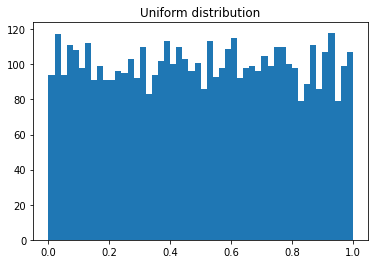

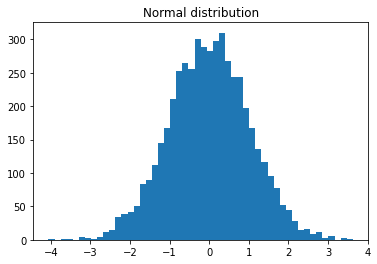

In [9]:
nr_samples = 5000
assert nr_samples % 2 == 0

# Generate uniform samples
seed = 240156
random = NumRecipesLCG(seed)
uniform_samples = np.empty(nr_samples)
for i in range(nr_samples):
    uniform_samples[i] = random()/2**32

# Use Box-Muller to transform to normal distributed numbers
normal_samples = np.empty(nr_samples)
for i in range(0, nr_samples, 2):
    U1 = uniform_samples[i]
    U2 = uniform_samples[i+1]
    Z1 = np.sqrt(-2*np.log(U1))*np.cos(2*np.pi*U2)
    Z2 = np.sqrt(-2*np.log(U1))*np.sin(2*np.pi*U2)
    normal_samples[i] = Z1
    normal_samples[i+1] = Z2



plt.hist(uniform_samples, bins=50)
plt.title('Uniform distribution')
plt.show()

plt.hist(normal_samples, bins=50)
plt.title('Normal distribution')
plt.show()

If we want to shift the standard deviation of the normal distribution or its mean, we can simply multiply each sample by $\sigma$, and if we want to move the mean we simply add $\mu$ to each sample.


## Seeding and Reproducibility

We have seen that a pRNG needs to start at a given *seed state* to be able to produce a sequence of pseudorandom numbers. It is up to the user of the system to select a seed, and feed it into the pRNG. The choice of the seed will impact what sequence of numbers we get. If we choose a different seed, we get a different sequence out.

Now, because each iteration of the pRNG is a deterministic computation, if we choose the *same seed state*, we get the same exact output. You might have noticed this already, if you execute the same examples in this notebook so far, we get the exact same output, the "random" numbers do not change whatsoever, until you change the seed.

While the fact that "random" numbers do not change on execution, but are 100% determined by the seed might feel like a major flaw of the system. However, recall that the goal is not to produce *true* random numbers, but *statistically* random numbers. The fact that the seed perfectly predicts the outcome is actually a major benefit!

Because the same seed produces the same "random" sequence, it means that our code is *reproducible* and much easier to test. In fact, this is one of the big reasons pRNGs exist in the first place. Von Neumann developed the middle-square method not only for speed, but also because he found it impossible to test and reproduce his code run with punch cards supplied random numbers. Of course, he could simply write down the sequence the random numbers where supplied into the program in, but the computer did not have close to enough memory to remember all these numbers. With his method however, to reproduce and test the program, you would simply need to remember a single number, the *seed state*.

A somewhat silly example of this is the game Minecraft. In Minecraft, the whole world is *procedurally generated*, meaning the world you start in is randomly generated following a set of rules. This means that every game of minecraft should have a completely unique world. However, perhaps you find a really cool world some time, and want to share it with a friend. Well, you would be in luck, because the Minecraft RNG used to randomly generated these worlds is a pRNG, and so if you simply feed in the correct *seed state* to this pRNG, you would end up with the same world. Minecraft uses this intentionally, and for any new world created, you can find the *seed* state of the world, which is basically a long number.

## Periodicity of a pRNG

There is an interesting consequence of a pRNG being completely deterministic. If you when iterating through and generating a sequence of random numbers, end up at the *same* number, you have effectively returned to your seed state. From this point onwards, your sequence will just repeat the exact same values!

Let us show an example of this with a very simple LCG, with $m=9$, $a=2$, $c=1$:

In [10]:
class SimpleLCG:
    def __init__(self, seed):
        self.state = seed

    def __call__(self):
        self.state = (2*self.state + 1) % 9
        return self.state

random = SimpleLCG(6)
for i in range(13):
    print(random())

4
0
1
3
7
6
4
0
1
3
7
6
4


Look closely at this sequence. We have seeded our pRNG with the seed value of $6$, when we iterate through and produce new numbers, we eventually end back up at the value 6. From that point onwards, the sequence just repeats itself in exactly the same manner. This is a huge problem, because an important quality of *statistically random* is that numbers are uncorrelated, and we are now getting big correlations in our datasets.

```{figure} ../../figures/xkcd_221.png
---
width: 400px
name: xkcd_221
alt: xkcd_221
---
Source: [XKCD #221](https://xkcd.com/221/)
```


The number of values a pRNG produces before it repeats itself is called its *period*. For our example, the period was 6, because it produced six numbers before repeating itself. It's important when we use a pRNG that we do not exhaust its period.

Now, our example LCG was purposefully very simple, to illustrate a short period. But note that while this LCG technically has 9 possible outcomes, because $m=9$, the period is shorter than 9. This is true for any LCG, if our LCG has $m=2^{32}$, then we know that the period is *at most* $2^{32}$. This is again because of the Pigeonhole principle, we simply have to hit a repeated number if we reach $2^{32}+1$ numbers, as we have exhausted all options.

Thus, for an LCG, the period is at *most* $2^{32}$, but it can be much shorter. And this is were good choices of $a$ and $c$ comes in, as we want to choose values that maximized the period. Note also that the seed also impacts the period. Normally, when we talk about the *period* of a pRNG, we refer to the longest possible period, if we choose the right seed. Seeds that produce cycles of shorter periods than the ideal are often called *bad seed states*. A good pRNG should not really have *bad seed states*, because it is unreasonable to assume our user knows what seeds to avoid.


Based on this, we see that RANDU is a LCG with $a=65539$, $m=2^{31}$ and $c=0$. As we have seen, these choices of parameters turned out to be bad. To get a better LCG you shouldn't try to choose these parameters yourself, but you should look them up. The [Wikipedia page on LCGs](https://en.wikipedia.org/wiki/Linear_congruential_generator#Parameters_in_common_use) lists the parameters used by the most commonly used generators today.


## The Infamous RANDU pRNG

Perhaps the most notorious pRNG is RANDU, a linear congruential generator made by IBM in the 1960s.

RANDU was created to be especially fast on certain hardware that was commonplace at the time. It chose the parameters $c=0$, $a=65539$ and $m=2^{31}$. Note also that it has to be seeded with an odd number:

In [11]:
class RANDU:
    def __init__(self, seed):
        assert seed % 2 == 1
        self.state = seed

    def __call__(self):
        self.state = 65539*self.state % 2**31
        return self.state

rand = RANDU(41451)
for i in range(5):
    print(rand())

569173441
1267183939
333059017
1331116891
694202897


Now, looking at these numbers. They look to be the same as the ones produced by our Numerical Recipes LCG shown earlier. However, it turns out that IBM choose parameters that were quite bad, and RANDU happens to produce numbers that are very correlated. Quoting [Wikipedia](https://en.wikipedia.org/wiki/RANDU):
> IBM's RANDU is widely considered to be one of the most ill-conceived random number generators ever designed[2], and was described as "truly horrible" by Donald Knuth.[3] It fails the spectral test badly for dimensions greater than 2, and every integer result is odd.

The "spectral test" in this regard refers to test LCGs, such as randu. If we use our pRNG to draw random points in a unit cube, if our pRNG is behaving as it should, these points will spread out uniformly in the cube, but if there is correlation between the different samples produced by the pRNG, we will see patterns forming in these random points. For most pRNGs we have to move to high dimensions before we can see these patterns, but for RANDU they show up even in 3D.


```{figure} ../../figures/randu_planes.png
---
width: 700px
name: randu_planes
alt: randu_planes
---
**Figure 2:** (Left) For a "good" pRNG, like the one used by `np.random`, we can see no discernible patterns in the random samples, i.e., they are uncorrelated. (Right) RANDU however, fails this test, as we can see the points line up into 15 parallel planes.
```


At the time of RANDU's creation, not enough diligence was put on verifying its properties. And because of its simplicity and speed, it was quite popular in the 60s and 70s. Because of this, a lot of scientific results that rely on stochastic simulations from that time are seen with skepticism.


## State vs Output

In all our examples so far, the *state* of the pRNG is simply the previously outputted number. However, there is a problem with this approach, because it means we cannot get *repeated* outcomes. For any truly random sequence, we sometimes expect repeated outcomes.

The solution to this problem is to create a pRNG that has a larger internal state, and then returns only parts o f that state. For example, an LCG might use a modulus of $m=2^{64}$, meaning the state has 64 bits of information, however, when actually returning the output to the user, they might only use certain parts of this number, such as extracting for example $48$ bits of information. For an LCG, it is common to return the most significant bits in this way, because it can be shown that these bits have a longer period than the lower bits.

By only returning parts of the state, we ensure that we can actually get the same output multiple times, without the state being the same and producing a low period.

A test of a pRNG testing this is called *the birthday test*, because it is based on the [Birthday problem](https://en.wikipedia.org/wiki/Birthday_problem). The Birthday problem is as follows: In a room of $n$ people, what is the chance that at least two people share the same birthday? Assuming that the birthdays of people in the room are random, it effectively asks the chance of drawing the same random sample from a distribution.

The Birthday problem has the surprising answer that with only 23 people in the room, there is a bigger than 50% chance that two people share a birthday, and that increases to a staggering 99.9% with just 70 people! By generalizing the problem, we can test wether an RNG gives us the expected number of repeated samples for a given distributions. Many simpler pRNGs fail the birthday test.


## Mersenne Twister

In this lecture, we have talked much about LCGs, and as we mentioned in the beginning, LCGs are historically important and much used. They are still seen quite a bit, but they are considered a bit out-dated. Wikipedia's article on LCGs has a [table](https://en.wikipedia.org/wiki/Linear_congruential_generator#Parameters_in_common_use) showing commonly used LCGs today, and you can see that it is for example, still used in Java.

In Python however, there is a different pRNG that is used, which is considered the *gold standard* for pRNGs. This gold standard is called the *Mersenne twister*. Let us first explain the name:

### Mersenne Primes

Mersenne primes are primes that can be written on the form $2^n-1$. Note that this expression is *not* prime for all $n$, but for some $n$, it is, and those are the Mersenne primes. Mersenne primes are interesting in mathematics, because it turns out that they have an important connection to *perfect* numbers. Because of this, people are searching hard to find every larger Mersenne primes.

The currently know largest prime is a Mersenne prime, specifically it is

$$2^{77,232,917} − 1,$$

which is a number with 23,249,425 digits. This happens to also be the largest prime known altogether. In fact, out of the 10 largest primes known, 9 of them are Mersenne primes.

Most of the largest Mersenne primes are found by a collaboration known as the [Great Internet Mersenne Prime Search](https://www.mersenne.org/) (GIMPS), which is a group of volunteers running the GIMPS software on their normal desktop computers.

The Electronic Frontier Foundation has traditionally given out large cash prizes to whoever breaks a big milestone, such as the first prime to pass one million, and ten million digits. The next prize is $150,000 to whoever finds the first prime with 100 million digits or more. It wouldn't be unreasonable to assume the GIMPS will be the first to find this number.

```{figure} ../../figures/largest_primes.png
---
width: 500px
name: largest_primes
alt: largest_primes
---
The number of digits in the largest prime known over time. Note that the vertical axis is logarithmic, meaning the growth is exponential. The dashed red line is the best fit exponential growth. Figure created by [Nicoguaro](https://commons.wikimedia.org/wiki/File:Digits_in_largest_prime_2016.svg), used under a [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/) license.
```


## Mersenne Twister 19937

The Mersenne twister algorithm is called *Mersenne* because it uses a specific Mersenne prime as its basis. This could in theory by any Mersenne prime, but the most commonly used version uses the Mersenne prime

$$2^{19937}-1,$$

and it is sometimes referred to as Mersenne Twister 19937 for this reason.

The "twister" part of the name comes from the fact that this algorithm is *blazingly* fast. And this name is not really an exaggeration, it is one of the fastest algorithms for drawing random numbers out there.

We won't go through this algorithm in detail, because it is a bit complicated, but for one thing, we can mention that it has a *period* of precisely

$$2^{19937}-1,$$

which is an amazingly large number. This means that there is no chance of hitting repeated cycles for any real application of the Mersenne Twister.

The Mersenne Twister algorithm was first published in 1997 by Makoto Matsumoto Takuji Nishimura. At that time it was definitely the best pRNG available. Over time the algorithm has been slightly been improved, but it is still  considered the gold standard. While some other options have become available, the Mersenne Twister is still a very good choice for most scientific programming applications.


Precisely because of its great qualities, the Mersenne twister is the pRNG of choice for most software purposes, and it is for example the one you use when you use `random` or `np.random` in Python. It is also available from the standard library in C++. While we won't cover how the Mersenne twister works, you should know about it, because it is what you will most likely end up using a lot in the future.


## A note on Cryptographic Security

While the Mersenne twister is a very good pRNG, it is not at all suited for *cryptographic* use cases. While you can freely use Mersenne twister for scientific programming or games, you should *not* use it for security purposes. In Python for example, starting with 3.6, there is a fully separate package used to produce more secure random numbers called `secrets`, which should be used instead of random.


## Generating Random Numbers in C++

When we start to use random numbers in the coming lectures, we will mostly stick with Python. However, we would like to take a few minutes to show you how to generate random numbers in your C++ programs as well, because there are some easy traps you can walk straight into. We first cover the "wrong" way to do things, this is the same way as in C, and the "old" C++ way. Then we cover the "proper" way to do things, which is available since C++11.



### The "Old" or "Wrong" way to do things

In C and C++, there is a built in function called simply `rand()`. This underlying pRNG that is used relies on your compiler, but in most cases, it is a LCG, though with different parameters for different compilers.

You can call it as a function with no input. The following complete C++ program prints out 5 consecutive integers from the pRNG:

***
```C++
#include <iostream>

int main() {
    for (int i=0; i<5; i++) {
        cout << rand() << endl;
    }
    return 0;
}
```
***

However, if you run the program several times, you will notice that the output is exactly the same. This is because if no seed is explicitly given, it will seed with the value `1`. And so each run of the program will therefore be identical.

You can explicitly seed your program with the built-in function `srand` (for "seed rand"). If you *do* want your program to behave differently each run,  a common way to do it is to use `time`, which gives you the current time in seconds. Running a program a few seconds apart will then give a different seed, and thus a different sequence:
***
```C++
srand(time(nullptr));

for (int i=0; i<5; i++) {
    cout << rand() << endl;
}
```
***

To translate the numbers made by `rand()` to useable numbers, we need to know the range of the pRNG. This is defined in the built-in variable `RAND_MAX`, which specifies the biggest integer we can get out, so to get random floats in the range $[0, 1)$, we need to divide by `RAND_MAX + 1`. we should also cast it to a double, otherwise we get integer division and most likely an overflow error.

Script that prints out 5 random floats:
***
```C++
srand(time(nullptr));

for (int i=0; i<5; i++) {
    cout << rand()/((double) RAND_MAX + 1) << endl;
}
```
***

Now, why do we call this the "wrong" way of doing things? Well, the C++ standard gives few guarantees for how good the underlying pRNG is, or about it's period. The only requirement from the C++ standard is that it should output at least 32 thousand numbers. A scientific application can easily exhaust this, and so using the built in `rand` would completely ruin the program. In addition, the `rand` function is an LCG, which is sort of outdated and not considered great.

### The "proper" way of generating random numbers in C++

With C++11, things were much improved for random numbers in C++, with a new standard header called `<random>`, that works much better than the `rand()` function.

First of, the `<random>` header splits up the underlying pRNG *engine*, and the random number distribution itself. So if we want to create random numbers, we should first specify what pRNG to use. We recommend sticking with the `mt19937` engine, its constructor only takes the seed as the input:
***
```C++
#include <random>

using namespace std;

int main() {
    int seed = 1424;
    mt19937 engine(seed);

    return 0;
}
```
***
Here we create an object of the class `mt19937`, which stands for Mersenne Twister ($2^{19937}-1$). Here we just select the seed manually, but you could also use `time` to do this. We called our Mersenne Twister object our *engine*, as it is what drives our randomness.

To actually use our engine object, we also need to create a *distribution* object, which converts the randomness made by our engine into whatever distribution we actually want. Let us start of with random floats between 0 and 1:

***
```C++
#include <iostream>
#include <random>

using namespace std;

int main(int argc, char const *argv[])
{
    // Generate engine
	int seed = 1424;
	mt19937 engine(seed);

    // Generate distribution
	uniform_real_distribution<float> uniform(0, 1);

    // Print random numbers
	for (int i=0; i<10; i++) {
		cout << uniform(engine) << endl;
	}

	return 0;
}
```
***

Here we again make our engine object. Next we make our distribution object. The constructor for the `uniform_real_distribution` takes the ends of the range, so we send in 0 and 1. We also have to template the distribution to tell it what data type we want as output. Here we select `float`, but `double` would be another natural type.

Note that we are making two distinct object types here: the engine (of type `mt19937`) and the distribution (of type `uniform_real_distribution`). The engine produces the actual randomness, the distribution "filters" it, so we get it out on the form we want. We need both to produce our samples, so we call it with `uniform(engine)` (these are the two names I chose for my two objects, you can choose other names).

Note that for any given program we should only ever create and use a single engine (unless we are parallel programming, in which case each thread should have its own engine). But we can make several distribution objects, and use them with the same engine. So say your program needs floats on the range 0 to 1, integers between 0 and 1999 and normally distributed numbers with a standard deviation of 3, we would set up our engine and distributions as follows

***
```C++
// Generate engine
int seed = 1424;
mt19937 engine(seed);

// Generate distributions
uniform_real_distribution<float> rand_float(0, 1);
uniform_int_distribution<int> rand_int(1000, 1999);
normal_distribution<float> rand_normal(0, 3);
```
***

Note that we are making two distinct types of objects here, the first is the Mersenne Twister engine, it is the one that is producing the randomness in the form of large integers. When we want to use that randomness, we filter it through a *distribution* object, which makes sure we get output that follows the distribution we want.

The standard `<random>` header has quite a few engines in addition to mersenne twister. Most of these exist for backward compatibility, so unless you have a really good reason to use them, just stick with MT19937 (or MT19937_64 if you need double float precision).

The header also has a lot of different distributions, and these can be very helpful, to produce different types of randomness for different programs. See the documentation to see what is available.

https://en.cppreference.com/w/cpp/numeric/random


### Comparing the "old" and "new" C++ way

The following talk by one of the Visual C++ developers is a good introduction to the new C++11 `<random>` header an why it exists:

* https://channel9.msdn.com/Events/GoingNative/2013/rand-Considered-Harmful

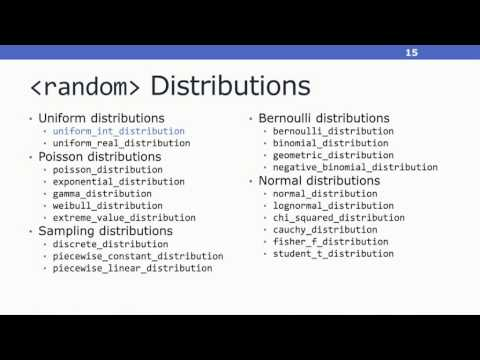

In [12]:
from IPython.display import YouTubeVideo

YouTubeVideo("LDPMpc-ENqY")